In [1]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
import yfinance as yf
import cufflinks as cf
cf.go_offline()

In [3]:
tickers = ["VIMTALABS.NS","BEL.NS","MANINFRA.NS","KEI.NS","DEEPAKNTR.NS","PITTIENG.NS","VINATIORGA.NS",
          "IONEXCHANG.NS","MARKSANS.NS","HAPPSTMNDS.NS","PERSISTENT.NS","EXPLEOSOL.NS",
          "JKPAPER.NS","MMFL.NS","TRITURBINE.NS","KKCL.NS","AVANTEL.BO","SKFINDIA.NS","VOLTAMP.NS","TIMKEN.BO",
           "GUJGASLTD.NS","PAGEIND.NS","ESABINDIA.NS","SUMICHEM.NS",
           "LAURUSLABS.NS"]

In [4]:
data = pd.DataFrame()

data = yf.download(tickers,period="4y")
     
data = data['Adj Close']
        
data.to_csv("//Users//sjacob//stocks//QALINVESTLATJAN24.csv")
data.dropna()

[*********************100%***********************]  25 of 25 completed


AVANTEL.BO      BEL.NS  DEEPAKNTR.NS  ESABINDIA.NS  EXPLEOSOL.NS  \
Date                                                                           
2022-02-22   11.277138   63.832485   1963.553711   2617.630615   1412.702393   
2022-02-23   11.362663   64.366180   1999.131958   2676.519775   1451.724121   
2022-02-24   10.853583   60.759727   1841.287476   2643.219482   1350.357666   
2022-02-25   11.062102   64.738144   1981.417236   2673.483887   1390.674927   
2022-02-28   11.426195   68.069656   1983.898315   2717.963867   1375.225708   
...                ...         ...           ...           ...           ...   
2024-01-19  124.400002  191.850006   2356.699951   5604.250000   1402.849976   
2024-01-23  129.550003  187.100006   2246.550049   5661.149902   1355.699951   
2024-01-24  128.699997  189.250000   2284.149902   5566.899902   1370.900024   
2024-01-25  124.650002  189.699997   2236.399902   5489.600098   1417.699951   
2024-01-29  121.449997  190.899994   2240.100098   5488.700195   1410.099976   

            GUJGASLTD.NS  HAPPSTMNDS.NS  IONEXCHANG.NS  JKPAPER.NS  \
Date                                                                 
2022-02-22    631.703857     971.719055     175.984451  210.575165   
2022-02-23    609.468994     983.440857     174.473648  214.972229   
2022-02-24    562.250793     934.278625     162.015289  198.157150   
2022-02-25    589.786560     964.003479     172.986374  206.178131   
2022-02-28    572.852783     967.317200     172.412155  216.663391   
...                  ...            ...            ...         ...   
2024-01-19    553.599976     889.599976     569.000000  429.950012   
2024-01-23    553.450012     856.299988     537.799988  406.450012   
2024-01-24    569.200012     867.750000     544.299988  413.600006   
2024-01-25    552.450012     866.549988     550.000000  420.700012   
2024-01-29    553.400024     856.200012     515.250000  436.500000   

                 KEI.NS  ...    PAGEIND.NS  PERSISTENT.NS  PITTIENG.NS  \
Date                     ...                                             
2022-02-22  1008.932861  ...  40316.718750    3882.206543   219.728424   
2022-02-23  1032.739990  ...  40678.835938    3914.483887   229.032227   
2022-02-24   991.614075  ...  39748.082031    3733.027832   215.769348   
2022-02-25  1019.813293  ...  41013.710938    3829.465088   230.022003   
2022-02-28   986.323547  ...  41784.597656    3892.883057   231.160248   
...                 ...  ...           ...            ...          ...   
2024-01-19  3112.850098  ...  37654.101562    7865.750000   667.599976   
2024-01-23  3014.250000  ...  36638.148438    8254.400391   643.599976   
2024-01-24  3314.750000  ...  36562.750000    8475.799805   640.000000   
2024-01-25  3183.000000  ...  36711.101562    8378.750000   647.000000   
2024-01-29  3193.149902  ...  37635.199219    8637.599609   649.599976   

            SKFINDIA.NS  SUMICHEM.NS    TIMKEN.BO  TRITURBINE.NS  \
Date                                                               
2022-02-22  3371.162109   360.374207  1967.290527     178.058350   
2022-02-23  3319.598145   366.144958  1983.475830     179.004929   
2022-02-24  3208.024658   356.792358  1937.218262     160.023346   
2022-02-25  3309.226318   367.239410  2057.457764     179.951538   
2022-02-28  3541.560059   374.751343  2024.238159     175.368042   
...                 ...          ...          ...            ...   
2024-01-19  4637.250000   402.799988  3416.949951     392.700012   
2024-01-23  4580.799805   396.250000  3307.800049     396.299988   
2024-01-24  4639.399902   398.149994  3345.699951     394.750000   
2024-01-25  4597.399902   394.200012  3296.149902     385.799988   
2024-01-29  4628.450195   396.600006  3281.899902     373.950012   

            VIMTALABS.NS  VINATIORGA.NS   VOLTAMP.NS  
Date                                                  
2022-02-22    329.475983    1807.868408  1883.227783  
2022-02-23    333.629669    1785.914551  1902.3

In [5]:
returns = np.log(data / data.shift(1))
vols = returns.std() * 252 ** 0.5 *100
vols

AVANTEL.BO       54.855143
BEL.NS           38.251961
DEEPAKNTR.NS     42.375318
ESABINDIA.NS     41.531209
EXPLEOSOL.NS     50.047215
GUJGASLTD.NS     34.525945
HAPPSTMNDS.NS    37.375122
IONEXCHANG.NS    44.191511
JKPAPER.NS       45.634746
KEI.NS           43.117092
KKCL.NS          39.424238
LAURUSLABS.NS    40.168022
MANINFRA.NS      50.015602
MARKSANS.NS      50.878059
MMFL.NS          44.398853
PAGEIND.NS       29.668079
PERSISTENT.NS    36.831324
PITTIENG.NS      54.136910
SKFINDIA.NS      32.053692
SUMICHEM.NS      36.298718
TIMKEN.BO        38.817565
TRITURBINE.NS    49.265074
VIMTALABS.NS     53.357361
VINATIORGA.NS    34.008754
VOLTAMP.NS       43.668671
dtype: float64

In [6]:
annual_returns = returns.mean() * 252 * 100
annual_returns

AVANTEL.BO       80.580845
BEL.NS           46.636624
DEEPAKNTR.NS     44.308634
ESABINDIA.NS     36.492190
EXPLEOSOL.NS     39.751946
GUJGASLTD.NS     16.659912
HAPPSTMNDS.NS    25.768825
IONEXCHANG.NS    56.753177
JKPAPER.NS       32.415869
KEI.NS           44.496134
KKCL.NS          36.818144
LAURUSLABS.NS    37.505649
MANINFRA.NS      64.732666
MARKSANS.NS      51.629509
MMFL.NS          20.369257
PAGEIND.NS       11.357294
PERSISTENT.NS    64.987162
PITTIENG.NS      68.430739
SKFINDIA.NS      22.328611
SUMICHEM.NS      15.074018
TIMKEN.BO        31.734182
TRITURBINE.NS    34.363052
VIMTALABS.NS     36.520590
VINATIORGA.NS    10.921975
VOLTAMP.NS       47.566553
dtype: float64

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

In [8]:

df = pd.DataFrame(columns = ['Ticker', 'Cov_mar','Market_var','Beta','Volatility%','Return%','CV','Sharp Ratio','CAGR','MAXDD%','Value at Risk']) 
data = pd.DataFrame()
data['^BSESN'] = yf.download('^BSESN',period="3y").Close

for t in tickers:
    try:
        data[t] = yf.download(t,period="3y").Close 
    except:
        continue
    sec_returns = np.log( data / data.shift(1) )
    cov = sec_returns.cov()*252
    cov_with_market = cov[t][0]
 
      
    dr = data[t].pct_change()
    dcum = (1 + dr).cumprod()
    n = len(data)/252
    CAGR = ((dcum[-1])**(1/n) - 1)*100
      
 
    
    droll = dcum.cummax()
    ddw = droll - dcum
    ddmax = ddw/droll
    max_dd = (ddmax.max())*100
   
 

    market_var = sec_returns['^BSESN'].var() * 252

    returns = np.log(data[t] / data[t].shift(1))
    MSFT_beta = cov_with_market / market_var
    MSFT_er = returns.mean()*252
    Sharp = (MSFT_er - 0.05) / (sec_returns[t].std() * 252 ** 0.5)
   

    #returns = np.log(data[t] / data[t].shift(1))
    vols = returns.std() * 252 ** 0.5 *100
    annual_returns = returns.mean() * 252 * 100
    CV = (vols/annual_returns)*100
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation
    mu = np.mean(returns)
    sigma = np.mean(returns.std())

    model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
    val = model.simulation()
    df.loc[len(df.index)] = [t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val] 
    
    
  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
df1 = df[(df['CAGR']>10 ) & (df['Return%']>10)]
df2 = df1.sort_values(by='Return%', ascending=False)
df2

Ticker   Cov_mar  Market_var      Beta  Volatility%    Return%  \
16     AVANTEL.BO  0.017964    0.021866  0.821544    53.874559  95.750708   
5     PITTIENG.NS  0.017911    0.021866  0.819155    49.862418  80.079939   
2     MANINFRA.NS  0.026131    0.021866  1.195058    44.428281  79.927336   
3          KEI.NS  0.014214    0.021866  0.650058    41.232588  65.860468   
18     VOLTAMP.NS  0.016016    0.021866  0.732474    42.895113  64.393513   
10  PERSISTENT.NS  0.022788    0.021866  1.042193    34.872969  59.231003   
7   IONEXCHANG.NS  0.012790    0.021866  0.584947    43.939809  53.783923   
14  TRITURBINE.NS  0.018118    0.021866  0.828621    46.039210  51.011246   
1          BEL.NS  0.018586    0.021866  0.850008    31.290192  50.620006   
15        KKCL.NS  0.014912    0.021866  0.681978    39.983685  49.662532   
12     JKPAPER.NS  0.024248    0.021866  1.108932    44.188694  42.076551   
22   ESABINDIA.NS  0.012640    0.021866  0.578081    36.516811  39.106080   
11   EXPLEOSOL.NS  0.016659    0.021866  0.761879    47.018819  37.365173   
19      TIMKEN.BO  0.010770    0.021866  0.492560    35.972302  35.539579   
17    SKFINDIA.NS  0.012723    0.021866  0.581846    29.767173  33.186565   
8     MARKSANS.NS  0.018215    0.021866  0.833056    44.324748  32.510862   
0    VIMTALABS.NS  0.011879    0.021866  0.543282    49.477745  30.957587   
9   HAPPSTMNDS.NS  0.016269    0.021866  0.744044    37.211605  30.825509   
4    DEEPAKNTR.NS  0.024015    0.021866  1.098277    36.269932  28.525277   
13        MMFL.NS  0.014052    0.021866  0.642660    36.133582  20.917518   
20   GUJGASLTD.NS  0.014639    0.021866  0.669513    32.656707  13.723505   
6   VINATIORGA.NS  0.009527    0.021866  0.435721    27.694308  12.034033   
21     PAGEIND.NS  0.015240    0.021866  0.696993    27.192043  11.392265   

            CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
16   56.265442     1.684482  164.607894  31.118336 -132023.622735  
5    62.265804     1.505742  122.490844  31.922989  -75057.304744  
2    55.585840     1.686478  122.152034  48.152470 -118767.280877  
3    62.605975     1.476028   93.037343  21.472188  -66051.891477  
18   66.614028     1.384622   90.230017  31.442913  -50782.250149  
10   58.876208     1.555101   80.671184  36.085400  -74934.872780  
7    81.696921     1.110244   41.298121  23.809918   -4655.732922  
14   90.253059     0.999393   66.432925  31.684732   10345.697486  
1    61.813885     1.457965   65.783922  22.007849  -56179.998101  
15   80.510767     1.117019   64.206286  33.172127   -8865.983587  
12  105.019763     0.839051   52.226010  31.294038   25944.572916  
22   93.378857     0.933983   47.776621  22.852517    7700.949290  
11  125.835947     0.688345   46.183976  36.096971   41873.867792  
19  101.217581     0.848975   41.094985  24.430418   15486.640325  
17   89.696456     0.946901   39.293994  24.793149     932.278489  
8   136.338275     0.620666   38.357217  58.276045   43932.814518  
0   159.824295     0.524632   37.334655  39.961254   57022.496426  
9   120.716919     0.694018   36.048053  49.800145   29785.919650  
4   127.150147     0.648617   32.958488  41.228339   31469.691030  
13  172.743165     0.440519   23.231205  29.965533   45218.763122  
20  237.961850     0.267128   14.688475  47.694597   48858.330220  
6   230.133222     0.253988   12.312217  28.090248   41929.140892  
21  238.688644     0.235079   11.742847  33.070984   41819.042280

In [10]:
df2.to_csv("//Users//sjacob//stocks//QUALITYINVESTJANI2024.csv")

In [11]:
pf_data = pd.DataFrame()
for t in df1["Ticker"]:
    pf_data[t] =  yf.download(t,period="3y").Close 

log_returns = np.log(pf_data / pf_data.shift(1))
num_assets = len(df1["Ticker"])
num_assets
weights = np.random.random(num_assets)
weights /= np.sum(weights)
np.sum(weights * log_returns.mean()) * 252
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
pfolio_returns = []
pfolio_volatilities = []
wts = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
    wts.append(weights)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
wts= np.array(wts)
pfolio_returns, pfolio_volatilities
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
#portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
#plt.xlabel('Expected Volatility')
#plt.ylabel('Expected Return')


portfolios.iplot(kind="scatter",
              x="Volatility", y='Return',
              mode='markers',
              xTitle="Volatility", yTitle="Return",
              title="========Volatility-------Return=========================",theme="solar")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

if __name__ == "__main__":
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation

    #historical data to approximate mean and standard deviation
    d = {}

    #download stock related data from Yahoo Finance
    for t in df1["Ticker"]:
        citi = yf.download(t,period="3y")
           #we can use pct_change() to calculate daily returns
        citi['returns'] = citi['Close'].pct_change()

    #we can assume daily returns to be normally sidtributed: mean and variance (standard deviation)
    #can describe the process
        mu = np.mean(citi['returns'])
        sigma = np.std(citi['returns'])

        model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
        val = model.simulation()
        d[t] = val
        print("VALUE AT RSIK for {} is".format(t))
        print('Value at risk with Monte-Carlo simulation in INR: %0.2f' % val)
    print("The minimum value at risk for the portofolios are:")
    print(min(d.values()))

[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for VIMTALABS.NS is
Value at risk with Monte-Carlo simulation in INR: 39737.25
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for BEL.NS is
Value at risk with Monte-Carlo simulation in INR: -78857.97
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for MANINFRA.NS is
Value at risk with Monte-Carlo simulation in INR: -186138.38
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for KEI.NS is
Value at risk with Monte-Carlo simulation in INR: -106996.90
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for DEEPAKNTR.NS is
Value at risk with Monte-Carlo simulation in INR: 16502.99
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for PITTIENG.NS is
Value at risk with Monte-Carlo simulation in INR: -145690.90
[*********************100%*********

In [13]:
for key,value in d.items():
    print(" The Value at risk per 1L invested in stock {} is {:0.2f}".format(key,value))

 The Value at risk per 1L invested in stock VIMTALABS.NS is 39737.25
 The Value at risk per 1L invested in stock BEL.NS is -78857.97
 The Value at risk per 1L invested in stock MANINFRA.NS is -186138.38
 The Value at risk per 1L invested in stock KEI.NS is -106996.90
 The Value at risk per 1L invested in stock DEEPAKNTR.NS is 16502.99
 The Value at risk per 1L invested in stock PITTIENG.NS is -145690.90
 The Value at risk per 1L invested in stock VINATIORGA.NS is 35705.60
 The Value at risk per 1L invested in stock IONEXCHANG.NS is -37181.33
 The Value at risk per 1L invested in stock MARKSANS.NS is 28510.23
 The Value at risk per 1L invested in stock HAPPSTMNDS.NS is 15516.00
 The Value at risk per 1L invested in stock PERSISTENT.NS is -108394.90
 The Value at risk per 1L invested in stock EXPLEOSOL.NS is 22054.88
 The Value at risk per 1L invested in stock JKPAPER.NS is 2807.66
 The Value at risk per 1L invested in stock MMFL.NS is 33714.17
 The Value at risk per 1L invested in stock

In [14]:
df2.reset_index(inplace = True)

In [15]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["CV"], y=df2["Value at Risk"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="CV", yaxis_title="VAR",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [16]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Return%"], y=df2["Volatility%"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [17]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Return%"], y=df2["CV"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [18]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Volatility%"], y=df2["Value at Risk"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="Value at Risk",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="VAR"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [19]:
norm = data.div(data.iloc[0,:]).mul(100)
norm.iplot(title="Comparision Analysis",xTitle='Date',yTitle="Normalized Price", fill = True, theme="pearl")

In [20]:
norm.iplot(title="Comparision Analysis",xTitle='Date',yTitle="Normalized Price", fill = True, theme="pearl")

In [21]:
ret = data.pct_change().dropna()

ret.iplot(kind="hist", bins=50, histnorm=None,theme="pearl")

In [22]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Volatility%"], y=df2["CV"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [23]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame
# Assuming you have a column in 'df2' named 'Ticker' for custom labels

fig = go.Figure()

scatter_trace = go.Scatter(
    x=df2["Volatility%"],
    y=df2["CV"],
    mode='markers+text',  # Use 'markers+text' mode to show text labels on markers
    text=df2["Ticker"],   # Use the 'Ticker' column as the label for each data point
    textposition="bottom center",  # Position of the text relative to the markers
    marker=dict(size=10)  # Adjust marker size as needed
)

fig.add_trace(scatter_trace)

fig.update_layout(
    title="========VOL------CV========================",
    xaxis_title="Volatility",
    yaxis_title="CV",
    xaxis=dict(title="Volatility"),
    yaxis=dict(title="CV"),
    showlegend=False,
    template="plotly_dark"  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.
)

fig.show()

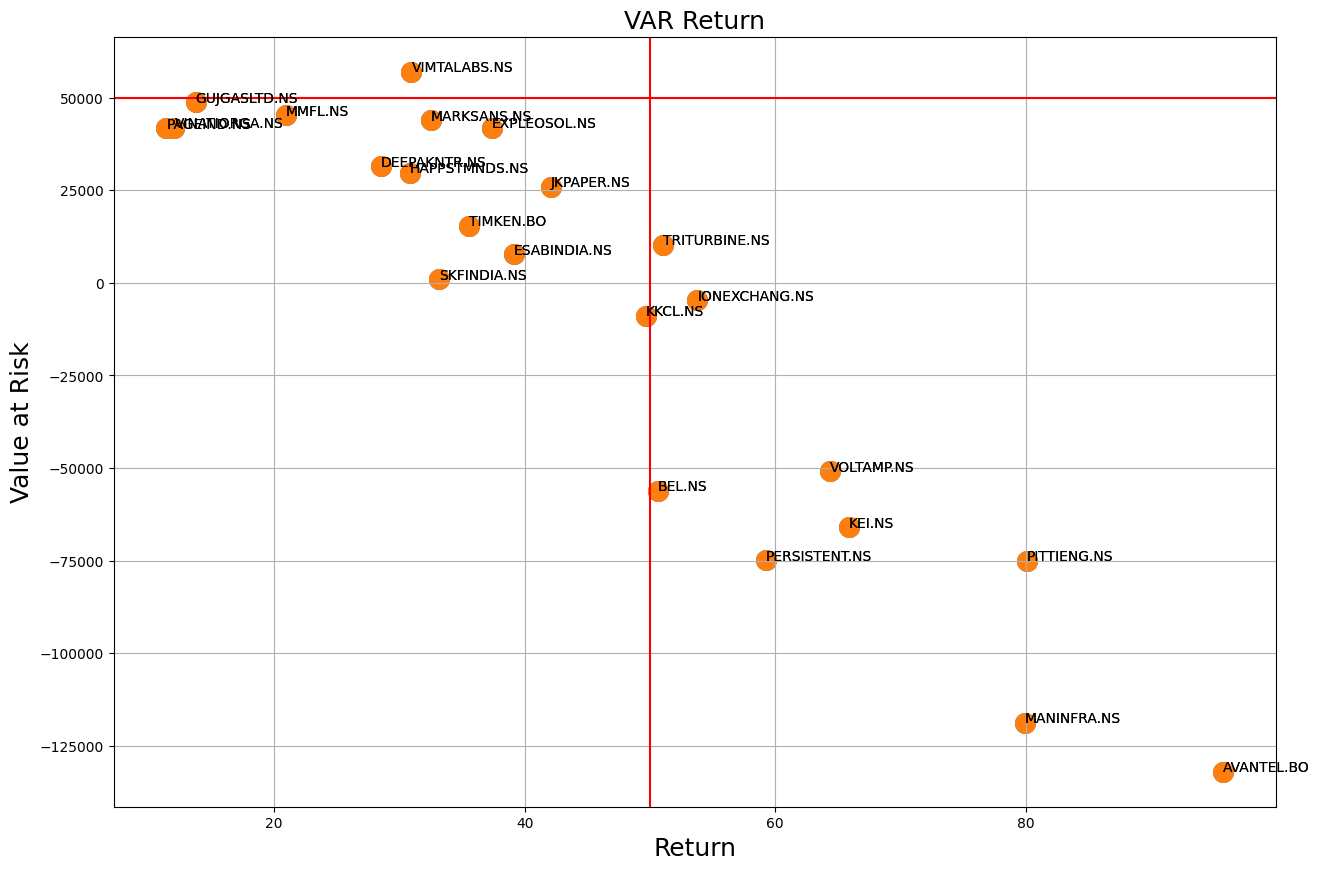

In [24]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

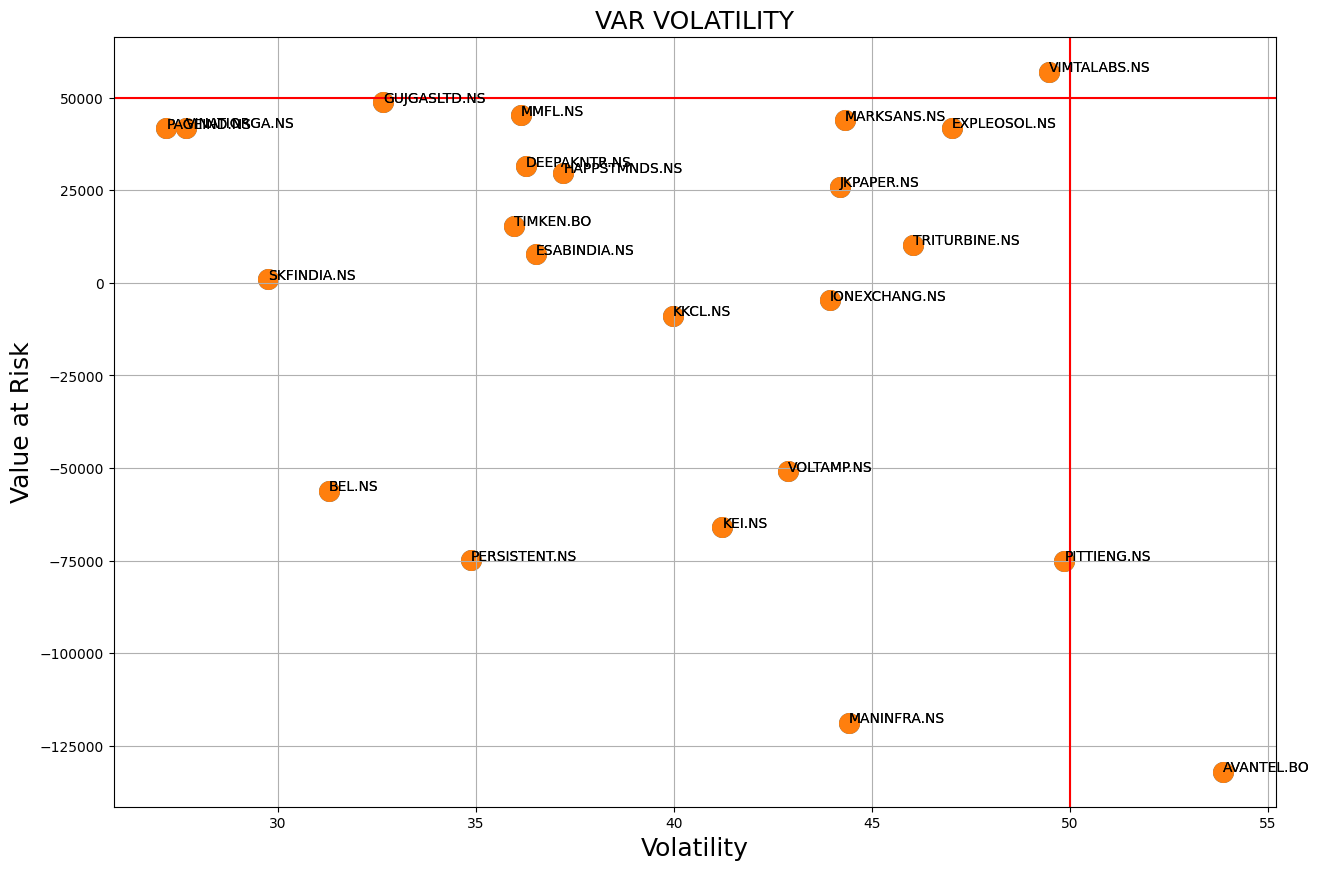

In [25]:
plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

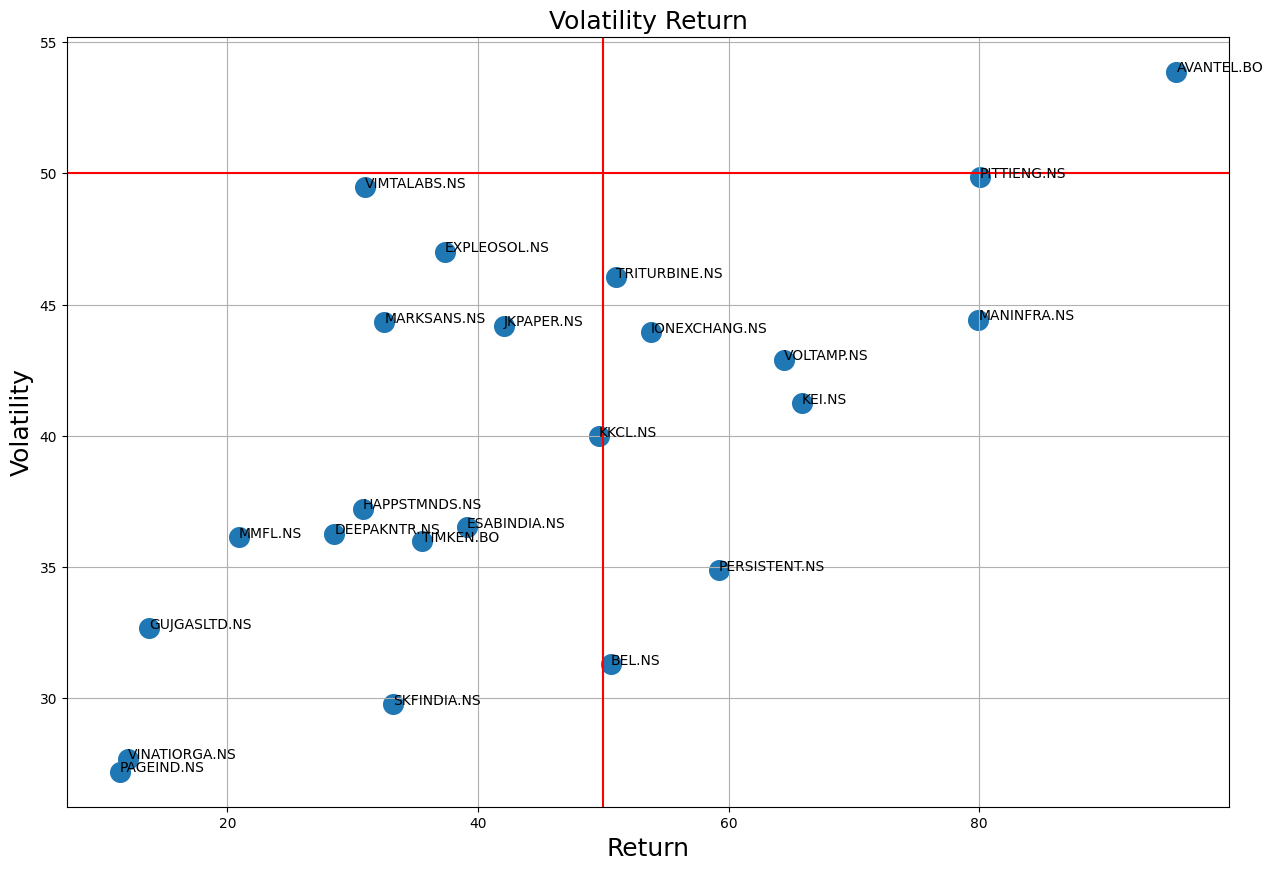

In [26]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Volatility%']
annotations = np.array(df2["Ticker"])
plt.grid(True)
plt.title('Volatility Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Volatility", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
i=0
for labels in annotations:
    plt.annotate(labels, (x[i], y[i]))
    i=i+1
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

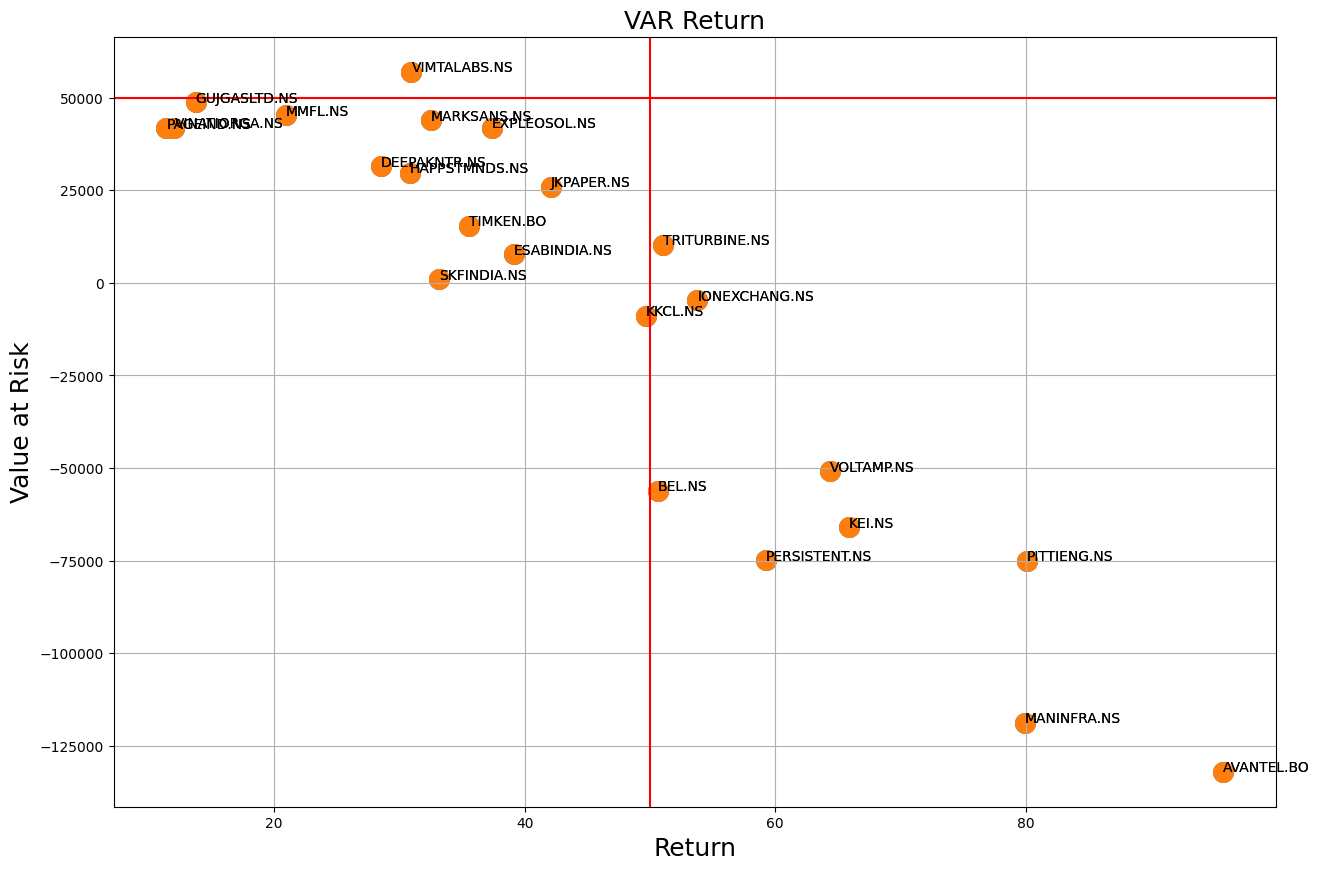

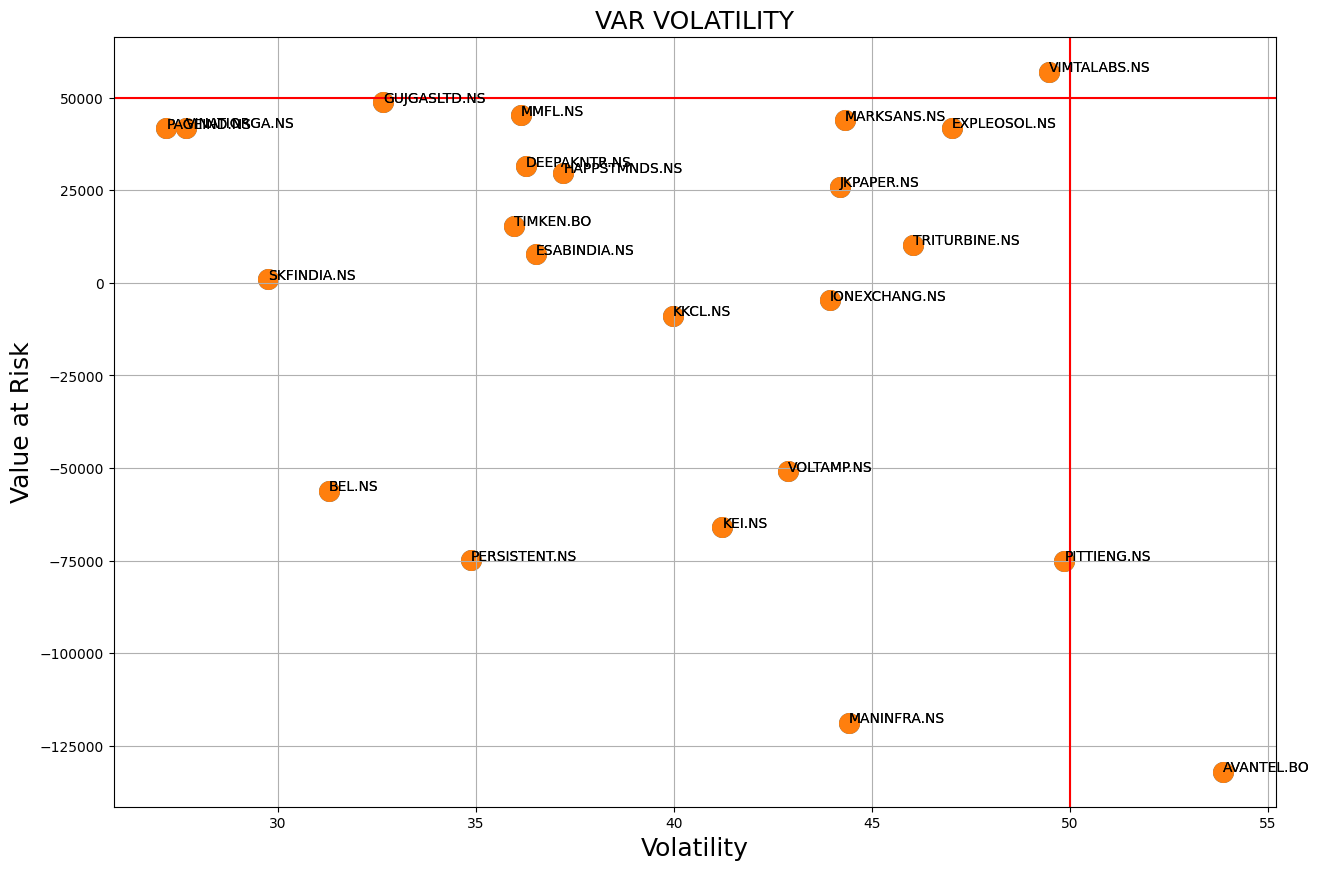

In [27]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

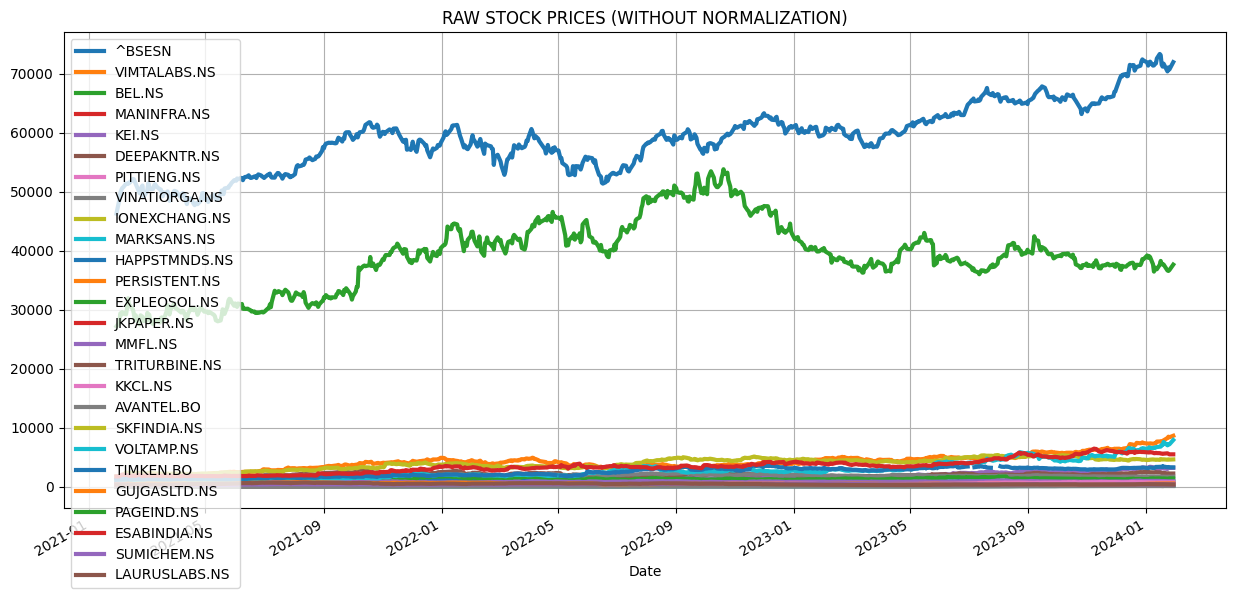

In [28]:
stocks_df = data
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()
stocks_df = stocks_df.reset_index()
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

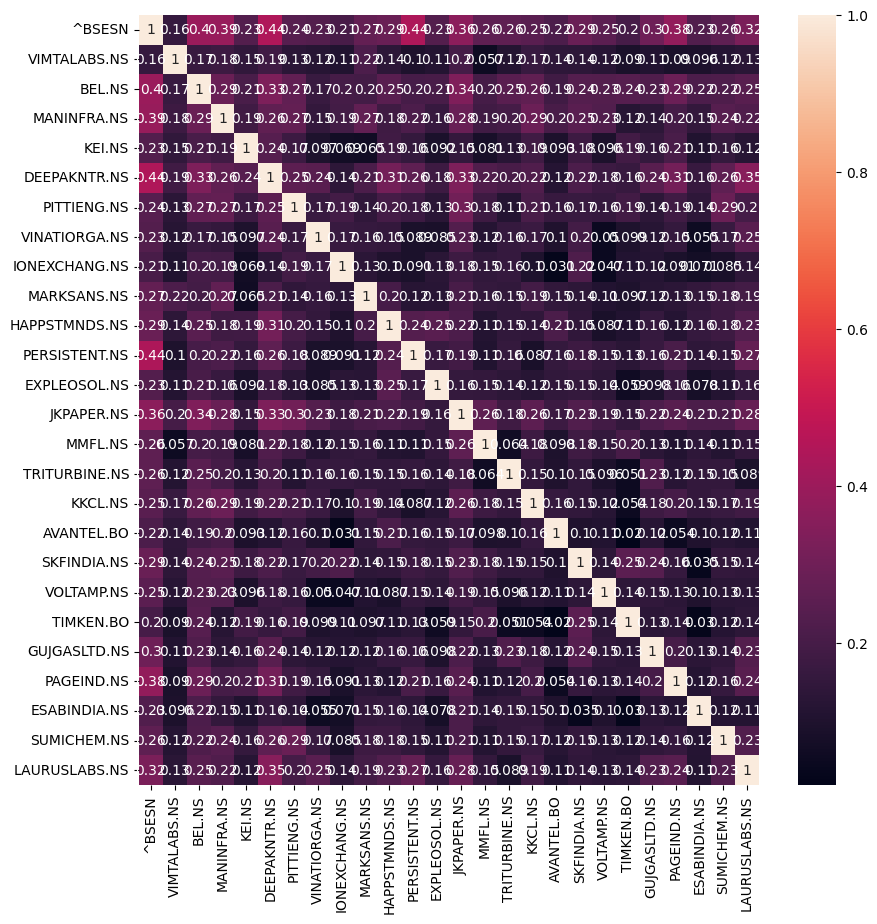

In [29]:
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

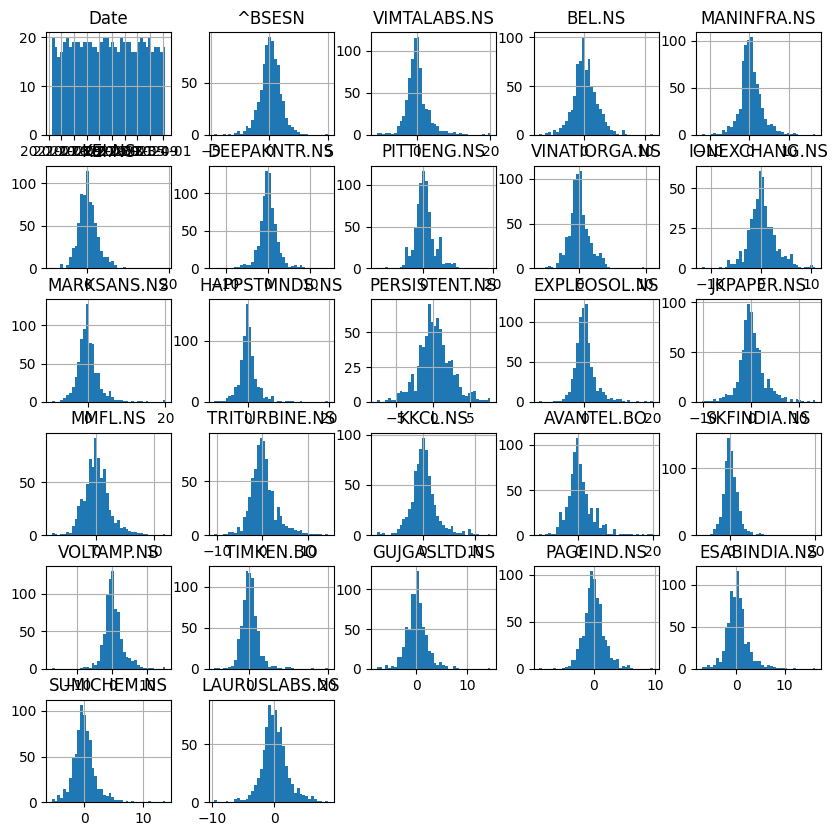

In [30]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

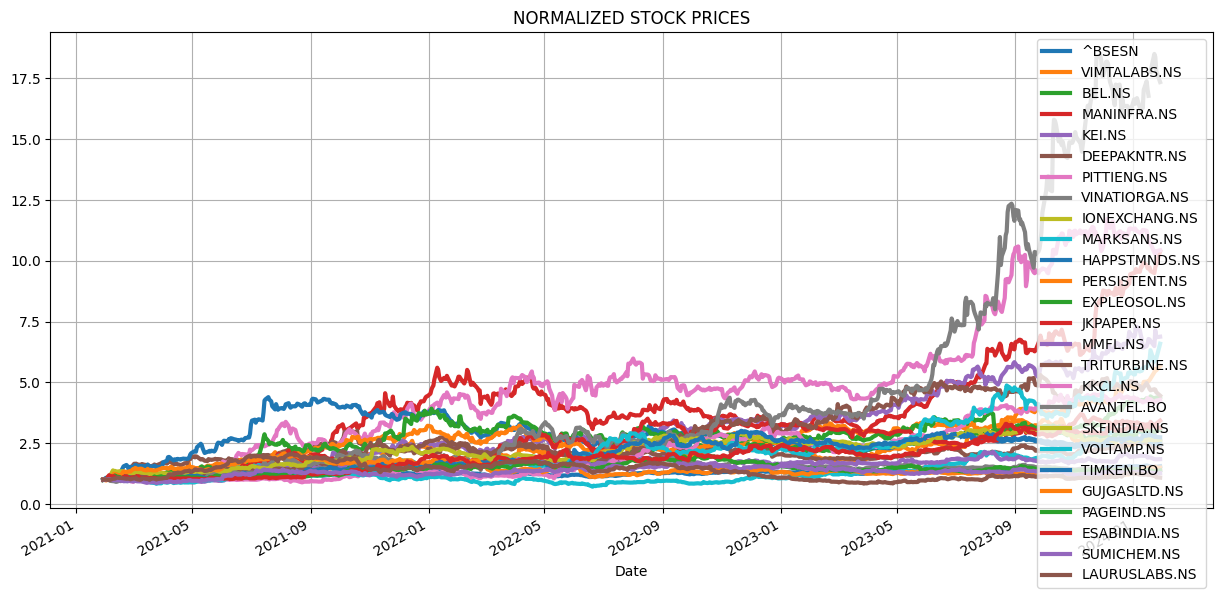

In [31]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [32]:
patterns = {
    'CDL2CROWS':'Two Crows',
    'CDL3BLACKCROWS':'Three Black Crows',
    'CDL3INSIDE':'Three Inside Up/Down',
    'CDL3LINESTRIKE':'Three-Line Strike',
    'CDL3OUTSIDE':'Three Outside Up/Down',
    'CDL3STARSINSOUTH':'Three Stars In The South',
    'CDL3WHITESOLDIERS':'Three Advancing White Soldiers',
    'CDLABANDONEDBABY':'Abandoned Baby',
    'CDLADVANCEBLOCK':'Advance Block',
    'CDLBELTHOLD':'Belt-hold',
    'CDLBREAKAWAY':'Breakaway',
    'CDLCLOSINGMARUBOZU':'Closing Marubozu',
    'CDLCONCEALBABYSWALL':'Concealing Baby Swallow',
    'CDLCOUNTERATTACK':'Counterattack',
    'CDLDARKCLOUDCOVER':'Dark Cloud Cover',
    'CDLDOJI':'Doji',
    'CDLDOJISTAR':'Doji Star',
    'CDLDRAGONFLYDOJI':'Dragonfly Doji',
    'CDLENGULFING':'Engulfing Pattern',
    'CDLEVENINGDOJISTAR':'Evening Doji Star',
    'CDLEVENINGSTAR':'Evening Star',
    'CDLGAPSIDESIDEWHITE':'Up/Down-gap side-by-side white lines',
    'CDLGRAVESTONEDOJI':'Gravestone Doji',
    'CDLHAMMER':'Hammer',
    'CDLHANGINGMAN':'Hanging Man',
    'CDLHARAMI':'Harami Pattern',
    'CDLHARAMICROSS':'Harami Cross Pattern',
    'CDLHIGHWAVE':'High-Wave Candle',
    'CDLHIKKAKE':'Hikkake Pattern',
    'CDLHIKKAKEMOD':'Modified Hikkake Pattern',
    'CDLHOMINGPIGEON':'Homing Pigeon',
    'CDLIDENTICAL3CROWS':'Identical Three Crows',
    'CDLINNECK':'In-Neck Pattern',
    'CDLINVERTEDHAMMER':'Inverted Hammer',
    'CDLKICKING':'Kicking',
    'CDLKICKINGBYLENGTH':'Kicking - bull/bear determined by the longer marubozu',
    'CDLLADDERBOTTOM':'Ladder Bottom',
    'CDLLONGLEGGEDDOJI':'Long Legged Doji',
    'CDLLONGLINE':'Long Line Candle',
    'CDLMARUBOZU':'Marubozu',
    'CDLMATCHINGLOW':'Matching Low',
    'CDLMATHOLD':'Mat Hold',
    'CDLMORNINGDOJISTAR':'Morning Doji Star',
    'CDLMORNINGSTAR':'Morning Star',
    'CDLONNECK':'On-Neck Pattern',
    'CDLPIERCING':'Piercing Pattern',
    'CDLRICKSHAWMAN':'Rickshaw Man',
    'CDLRISEFALL3METHODS':'Rising/Falling Three Methods',
    'CDLSEPARATINGLINES':'Separating Lines',
    'CDLSHOOTINGSTAR':'Shooting Star',
    'CDLSHORTLINE':'Short Line Candle',
    'CDLSPINNINGTOP':'Spinning Top',
    'CDLSTALLEDPATTERN':'Stalled Pattern',
    'CDLSTICKSANDWICH':'Stick Sandwich',
    'CDLTAKURI':'Takuri (Dragonfly Doji with very long lower shadow)',
    'CDLTASUKIGAP':'Tasuki Gap',
    'CDLTHRUSTING':'Thrusting Pattern',
    'CDLTRISTAR':'Tristar Pattern',
    'CDLUNIQUE3RIVER':'Unique 3 River',
    'CDLUPSIDEGAP2CROWS':'Upside Gap Two Crows',
    'CDLXSIDEGAP3METHODS':'Upside/Downside Gap Three Methods'
}

In [33]:
import os, csv
import pandas as pd
import yfinance as yf
import talib

import datetime
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

def candle_trend(patterns,tickers):
    
    data = pd.DataFrame(columns=['Ticker','Candle-Pattern','Definition','Signal'])
    for t in tickers:
        try: 
            df = yf.download(t, period="4y") 
    
        
            for pattern in patterns:
                ta_function = getattr(talib, pattern)
                result = ta_function(df['Open'], df['High'], df['Low'], df['Close'])
                last_pattern = result.tail(1).values[0]
                if last_pattern > 0:
                    data = data.append(pd.Series([t,pattern,patterns[pattern],"BULLISH"],index=data.columns), ignore_index=True)
                
                
                elif last_pattern < 0:
                    data = data.append(pd.Series([t,pattern,patterns[pattern],"BEAR"],index=data.columns), ignore_index=True)
        except:
            continue

    return data
g=candle_trend(patterns,tickers)

[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_88135/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


In [34]:
g

Ticker      Candle-Pattern            Definition   Signal
0    VIMTALABS.NS             CDLDOJI                  Doji  BULLISH
1    VIMTALABS.NS         CDLHIGHWAVE      High-Wave Candle     BEAR
2    VIMTALABS.NS   CDLLONGLEGGEDDOJI      Long Legged Doji  BULLISH
3    VIMTALABS.NS      CDLRICKSHAWMAN          Rickshaw Man  BULLISH
4    VIMTALABS.NS      CDLSPINNINGTOP          Spinning Top     BEAR
5          BEL.NS         CDLHIGHWAVE      High-Wave Candle  BULLISH
6          BEL.NS      CDLSPINNINGTOP          Spinning Top  BULLISH
7     MANINFRA.NS         CDLBELTHOLD             Belt-hold  BULLISH
8          KEI.NS             CDLDOJI                  Doji  BULLISH
9          KEI.NS           CDLHARAMI        Harami Pattern  BULLISH
10         KEI.NS      CDLHARAMICROSS  Harami Cross Pattern  BULLISH
11         KEI.NS         CDLHIGHWAVE      High-Wave Candle     BEAR
12         KEI.NS          CDLHIKKAKE       Hikkake Pattern  BULLISH
13         KEI.NS     CDLHOMINGPIGEON         Homing Pigeon  BULLISH
14         KEI.NS   CDLLONGLEGGEDDOJI      Long Legged Doji  BULLISH
15         KEI.NS      CDLRICKSHAWMAN          Rickshaw Man  BULLISH
16         KEI.NS      CDLSPINNINGTOP          Spinning Top     BEAR
17   DEEPAKNTR.NS             CDLDOJI                  Doji  BULLISH
18   DEEPAKNTR.NS         CDLHIGHWAVE      High-Wave Candle  BULLISH
19   DEEPAKNTR.NS   CDLLONGLEGGEDDOJI      Long Legged Doji  BULLISH
20   DEEPAKNTR.NS      CDLRICKSHAWMAN          Rickshaw Man  BULLISH
21   DEEPAKNTR.NS        CDLSHORTLINE     Short Line Candle  BULLISH
22   DEEPAKNTR.NS      CDLSPINNINGTOP          Spinning Top  BULLISH
23    PITTIENG.NS          CDLHIKKAKE       Hikkake Pattern     BEAR
24    PITTIENG.NS        CDLSHORTLINE     Short Line Candle  BULLISH
25    PITTIENG.NS      CDLSPINNINGTOP          Spinning Top  BULLISH
26  IONEXCHANG.NS         CDLBELTHOLD             Belt-hold     BEAR
27  IONEXCHANG.NS          CDLHIKKAKE       Hikkake Pattern  BULLISH
28  IONEXCHANG.NS         CDLLONGLINE      Long Line Candle     BEAR
29    MARKSANS.NS         CDLLONGLINE      Long Line Candle     BEAR
30  HAPPSTMNDS.NS        CDLSHORTLINE     Short Line Candle     BEAR
31  PERSISTENT.NS  CDLCLOSINGMARUBOZU      Closing Marubozu  BULLISH
32   EXPLEOSOL.NS        CDLSHORTLINE     Short Line Candle     BEAR
33     JKPAPER.NS         CDLBELTHOLD             Belt-hold  BULLISH
34        MMFL.NS        CDLSHORTLINE     Short Line Candle  BULLISH
35        MMFL.NS      CDLSPINNINGTOP          Spinning Top  BULLISH
36        KKCL.NS         CDLBELTHOLD             Belt-hold  BULLISH
37     AVANTEL.BO         CDLBELTHOLD             Belt-hold     BEAR
38     VOLTAMP.NS         CDLBELTHOLD             Belt-hold  BULLISH
39      TIMKEN.BO        CDLSHORTLINE     Short Line Candle     BEAR
40   GUJGASLTD.NS           CDLHARAMI        Harami Pattern  BULLISH
41   GUJGASLTD.NS     CDLHOMINGPIGEON         Homing Pigeon  BULLISH
42   GUJGASLTD.NS        CDLSHORTLINE     Short Line Candle     BEAR
43     PAGEIND.NS          CDLHIKKAKE       Hikkake Pattern     BEAR
44   ESABINDIA.NS      CDLMATCHINGLOW          Matching Low  BULLISH
45   ESABINDIA.NS      CDLSPINNINGTOP          Spinning Top     BEAR
46    SUMICHEM.NS           CDLHARAMI        Harami Pattern  BULLISH

In [35]:
g.Ticker.unique()

array(['VIMTALABS.NS', 'BEL.NS', 'MANINFRA.NS', 'KEI.NS', 'DEEPAKNTR.NS',
       'PITTIENG.NS', 'IONEXCHANG.NS', 'MARKSANS.NS', 'HAPPSTMNDS.NS',
       'PERSISTENT.NS', 'EXPLEOSOL.NS', 'JKPAPER.NS', 'MMFL.NS',
       'KKCL.NS', 'AVANTEL.BO', 'VOLTAMP.NS', 'TIMKEN.BO', 'GUJGASLTD.NS',
       'PAGEIND.NS', 'ESABINDIA.NS', 'SUMICHEM.NS'], dtype=object)

In [36]:
g['Candle-Pattern'].unique()

array(['CDLDOJI', 'CDLHIGHWAVE', 'CDLLONGLEGGEDDOJI', 'CDLRICKSHAWMAN',
       'CDLSPINNINGTOP', 'CDLBELTHOLD', 'CDLHARAMI', 'CDLHARAMICROSS',
       'CDLHIKKAKE', 'CDLHOMINGPIGEON', 'CDLSHORTLINE', 'CDLLONGLINE',
       'CDLCLOSINGMARUBOZU', 'CDLMATCHINGLOW'], dtype=object)

In [37]:
df2.head(20)

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0      16     AVANTEL.BO  0.017964    0.021866  0.821544    53.874559   
1       5    PITTIENG.NS  0.017911    0.021866  0.819155    49.862418   
2       2    MANINFRA.NS  0.026131    0.021866  1.195058    44.428281   
3       3         KEI.NS  0.014214    0.021866  0.650058    41.232588   
4      18     VOLTAMP.NS  0.016016    0.021866  0.732474    42.895113   
5      10  PERSISTENT.NS  0.022788    0.021866  1.042193    34.872969   
6       7  IONEXCHANG.NS  0.012790    0.021866  0.584947    43.939809   
7      14  TRITURBINE.NS  0.018118    0.021866  0.828621    46.039210   
8       1         BEL.NS  0.018586    0.021866  0.850008    31.290192   
9      15        KKCL.NS  0.014912    0.021866  0.681978    39.983685   
10     12     JKPAPER.NS  0.024248    0.021866  1.108932    44.188694   
11     22   ESABINDIA.NS  0.012640    0.021866  0.578081    36.516811   
12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879    47.018819   
13     19      TIMKEN.BO  0.010770    0.021866  0.492560    35.972302   
14     17    SKFINDIA.NS  0.012723    0.021866  0.581846    29.767173   
15      8    MARKSANS.NS  0.018215    0.021866  0.833056    44.324748   
16      0   VIMTALABS.NS  0.011879    0.021866  0.543282    49.477745   
17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044    37.211605   
18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277    36.269932   
19     13        MMFL.NS  0.014052    0.021866  0.642660    36.133582   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   95.750708   56.265442     1.684482  164.607894  31.118336 -132023.622735  
1   80.079939   62.265804     1.505742  122.490844  31.922989  -75057.304744  
2   79.927336   55.585840     1.686478  122.152034  48.152470 -118767.280877  
3   65.860468   62.605975     1.476028   93.037343  21.472188  -66051.891477  
4   64.393513   66.614028     1.384622   90.230017  31.442913  -50782.250149  
5   59.231003   58.876208     1.555101   80.671184  36.085400  -74934.872780  
6   53.783923   81.696921     1.110244   41.298121  23.809918   -4655.732922  
7   51.011246   90.253059     0.999393   66.432925  31.684732   10345.697486  
8   50.620006   61.813885     1.457965   65.783922  22.007849  -56179.998101  
9   49.662532   80.510767     1.117019   64.206286  33.172127   -8865.983587  
10  42.076551  105.019763     0.839051   52.226010  31.294038   25944.572916  
11  39.106080   93.378857     0.933983   47.776621  22.852517    7700.949290  
12  37.365173  125.835947     0.688345   46.183976  36.096971   41873.867792  
13  35.539579  101.217581     0.848975   41.094985  24.430418   15486.640325  
14  33.186565   89.696456     0.946901   39.293994  24.793149     932.278489  
15  32.510862  136.338275     0.620666   38.357217  58.276045   43932.814518  
16  30.957587  159.824295     0.524632   37.334655  39.961254   57022.496426  
17  30.825509  120.716919     0.694018   36.048053  49.800145   29785.919650  
18  28.525277  127.150147     0.648617   32.958488  41.228339   31469.691030  
19  20.917518  172.743165     0.440519   23.231205  29.965533   45218.763122

In [38]:
df2[(df2['CAGR']>15 ) & (df2['Return%']>15)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0      16     AVANTEL.BO  0.017964    0.021866  0.821544    53.874559   
1       5    PITTIENG.NS  0.017911    0.021866  0.819155    49.862418   
2       2    MANINFRA.NS  0.026131    0.021866  1.195058    44.428281   
3       3         KEI.NS  0.014214    0.021866  0.650058    41.232588   
4      18     VOLTAMP.NS  0.016016    0.021866  0.732474    42.895113   
5      10  PERSISTENT.NS  0.022788    0.021866  1.042193    34.872969   
6       7  IONEXCHANG.NS  0.012790    0.021866  0.584947    43.939809   
7      14  TRITURBINE.NS  0.018118    0.021866  0.828621    46.039210   
8       1         BEL.NS  0.018586    0.021866  0.850008    31.290192   
9      15        KKCL.NS  0.014912    0.021866  0.681978    39.983685   
10     12     JKPAPER.NS  0.024248    0.021866  1.108932    44.188694   
11     22   ESABINDIA.NS  0.012640    0.021866  0.578081    36.516811   
12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879    47.018819   
13     19      TIMKEN.BO  0.010770    0.021866  0.492560    35.972302   
14     17    SKFINDIA.NS  0.012723    0.021866  0.581846    29.767173   
15      8    MARKSANS.NS  0.018215    0.021866  0.833056    44.324748   
16      0   VIMTALABS.NS  0.011879    0.021866  0.543282    49.477745   
17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044    37.211605   
18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277    36.269932   
19     13        MMFL.NS  0.014052    0.021866  0.642660    36.133582   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   95.750708   56.265442     1.684482  164.607894  31.118336 -132023.622735  
1   80.079939   62.265804     1.505742  122.490844  31.922989  -75057.304744  
2   79.927336   55.585840     1.686478  122.152034  48.152470 -118767.280877  
3   65.860468   62.605975     1.476028   93.037343  21.472188  -66051.891477  
4   64.393513   66.614028     1.384622   90.230017  31.442913  -50782.250149  
5   59.231003   58.876208     1.555101   80.671184  36.085400  -74934.872780  
6   53.783923   81.696921     1.110244   41.298121  23.809918   -4655.732922  
7   51.011246   90.253059     0.999393   66.432925  31.684732   10345.697486  
8   50.620006   61.813885     1.457965   65.783922  22.007849  -56179.998101  
9   49.662532   80.510767     1.117019   64.206286  33.172127   -8865.983587  
10  42.076551  105.019763     0.839051   52.226010  31.294038   25944.572916  
11  39.106080   93.378857     0.933983   47.776621  22.852517    7700.949290  
12  37.365173  125.835947     0.688345   46.183976  36.096971   41873.867792  
13  35.539579  101.217581     0.848975   41.094985  24.430418   15486.640325  
14  33.186565   89.696456     0.946901   39.293994  24.793149     932.278489  
15  32.510862  136.338275     0.620666   38.357217  58.276045   43932.814518  
16  30.957587  159.824295     0.524632   37.334655  39.961254   57022.496426  
17  30.825509  120.716919     0.694018   36.048053  49.800145   29785.919650  
18  28.525277  127.150147     0.648617   32.958488  41.228339   31469.691030  
19  20.917518  172.743165     0.440519   23.231205  29.965533   45218.763122

In [39]:
df2[(df2['CAGR']>15 ) & (df2['Return%']>15) & (df2['Volatility%']<50)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
1       5    PITTIENG.NS  0.017911    0.021866  0.819155    49.862418   
2       2    MANINFRA.NS  0.026131    0.021866  1.195058    44.428281   
3       3         KEI.NS  0.014214    0.021866  0.650058    41.232588   
4      18     VOLTAMP.NS  0.016016    0.021866  0.732474    42.895113   
5      10  PERSISTENT.NS  0.022788    0.021866  1.042193    34.872969   
6       7  IONEXCHANG.NS  0.012790    0.021866  0.584947    43.939809   
7      14  TRITURBINE.NS  0.018118    0.021866  0.828621    46.039210   
8       1         BEL.NS  0.018586    0.021866  0.850008    31.290192   
9      15        KKCL.NS  0.014912    0.021866  0.681978    39.983685   
10     12     JKPAPER.NS  0.024248    0.021866  1.108932    44.188694   
11     22   ESABINDIA.NS  0.012640    0.021866  0.578081    36.516811   
12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879    47.018819   
13     19      TIMKEN.BO  0.010770    0.021866  0.492560    35.972302   
14     17    SKFINDIA.NS  0.012723    0.021866  0.581846    29.767173   
15      8    MARKSANS.NS  0.018215    0.021866  0.833056    44.324748   
16      0   VIMTALABS.NS  0.011879    0.021866  0.543282    49.477745   
17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044    37.211605   
18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277    36.269932   
19     13        MMFL.NS  0.014052    0.021866  0.642660    36.133582   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
1   80.079939   62.265804     1.505742  122.490844  31.922989  -75057.304744  
2   79.927336   55.585840     1.686478  122.152034  48.152470 -118767.280877  
3   65.860468   62.605975     1.476028   93.037343  21.472188  -66051.891477  
4   64.393513   66.614028     1.384622   90.230017  31.442913  -50782.250149  
5   59.231003   58.876208     1.555101   80.671184  36.085400  -74934.872780  
6   53.783923   81.696921     1.110244   41.298121  23.809918   -4655.732922  
7   51.011246   90.253059     0.999393   66.432925  31.684732   10345.697486  
8   50.620006   61.813885     1.457965   65.783922  22.007849  -56179.998101  
9   49.662532   80.510767     1.117019   64.206286  33.172127   -8865.983587  
10  42.076551  105.019763     0.839051   52.226010  31.294038   25944.572916  
11  39.106080   93.378857     0.933983   47.776621  22.852517    7700.949290  
12  37.365173  125.835947     0.688345   46.183976  36.096971   41873.867792  
13  35.539579  101.217581     0.848975   41.094985  24.430418   15486.640325  
14  33.186565   89.696456     0.946901   39.293994  24.793149     932.278489  
15  32.510862  136.338275     0.620666   38.357217  58.276045   43932.814518  
16  30.957587  159.824295     0.524632   37.334655  39.961254   57022.496426  
17  30.825509  120.716919     0.694018   36.048053  49.800145   29785.919650  
18  28.525277  127.150147     0.648617   32.958488  41.228339   31469.691030  
19  20.917518  172.743165     0.440519   23.231205  29.965533   45218.763122

In [40]:
np.corrcoef(df1['CV'], df1['Value at Risk'])[0][1]

0.7513542453820132

In [41]:
def t_stat_corr(df, x, y):
    """Returns the t-statistic for the correlation between 2 variables"""
    corr_xy = np.corrcoef(df[x], df[y])[0][1]
    n = len(df)
    
    t_stat = (corr_xy * np.sqrt(n - 2)) / np.sqrt(1 - corr_xy ** 2)
    
    return t_stat

In [42]:
# H1
t_stat_corr(df=df1, y='Value at Risk', x='CV')

5.217673124569202

In [43]:
t_stat_corr(df=df1, y='Return%', x='CV')

-7.38350348084548

In [44]:
t_stat_corr(df=df1, y='Volatility%', x='Return%')

4.085509723820144

In [45]:
t_stat_corr(df=df1, y='Volatility%', x='CV')

-2.5553731539064297

In [46]:
t_stat_corr(df=df1, y='Volatility%', x='MAXDD%')

0.8328046815699194

In [47]:

t_stat_corr(df=df1, y='Return%', x='MAXDD%')

-0.7288178140371473

In [48]:
df2[(df2['CAGR']>20 ) & (df2['Return%']>20) & (df2['Volatility%']<50)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
1       5    PITTIENG.NS  0.017911    0.021866  0.819155    49.862418   
2       2    MANINFRA.NS  0.026131    0.021866  1.195058    44.428281   
3       3         KEI.NS  0.014214    0.021866  0.650058    41.232588   
4      18     VOLTAMP.NS  0.016016    0.021866  0.732474    42.895113   
5      10  PERSISTENT.NS  0.022788    0.021866  1.042193    34.872969   
6       7  IONEXCHANG.NS  0.012790    0.021866  0.584947    43.939809   
7      14  TRITURBINE.NS  0.018118    0.021866  0.828621    46.039210   
8       1         BEL.NS  0.018586    0.021866  0.850008    31.290192   
9      15        KKCL.NS  0.014912    0.021866  0.681978    39.983685   
10     12     JKPAPER.NS  0.024248    0.021866  1.108932    44.188694   
11     22   ESABINDIA.NS  0.012640    0.021866  0.578081    36.516811   
12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879    47.018819   
13     19      TIMKEN.BO  0.010770    0.021866  0.492560    35.972302   
14     17    SKFINDIA.NS  0.012723    0.021866  0.581846    29.767173   
15      8    MARKSANS.NS  0.018215    0.021866  0.833056    44.324748   
16      0   VIMTALABS.NS  0.011879    0.021866  0.543282    49.477745   
17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044    37.211605   
18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277    36.269932   
19     13        MMFL.NS  0.014052    0.021866  0.642660    36.133582   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
1   80.079939   62.265804     1.505742  122.490844  31.922989  -75057.304744  
2   79.927336   55.585840     1.686478  122.152034  48.152470 -118767.280877  
3   65.860468   62.605975     1.476028   93.037343  21.472188  -66051.891477  
4   64.393513   66.614028     1.384622   90.230017  31.442913  -50782.250149  
5   59.231003   58.876208     1.555101   80.671184  36.085400  -74934.872780  
6   53.783923   81.696921     1.110244   41.298121  23.809918   -4655.732922  
7   51.011246   90.253059     0.999393   66.432925  31.684732   10345.697486  
8   50.620006   61.813885     1.457965   65.783922  22.007849  -56179.998101  
9   49.662532   80.510767     1.117019   64.206286  33.172127   -8865.983587  
10  42.076551  105.019763     0.839051   52.226010  31.294038   25944.572916  
11  39.106080   93.378857     0.933983   47.776621  22.852517    7700.949290  
12  37.365173  125.835947     0.688345   46.183976  36.096971   41873.867792  
13  35.539579  101.217581     0.848975   41.094985  24.430418   15486.640325  
14  33.186565   89.696456     0.946901   39.293994  24.793149     932.278489  
15  32.510862  136.338275     0.620666   38.357217  58.276045   43932.814518  
16  30.957587  159.824295     0.524632   37.334655  39.961254   57022.496426  
17  30.825509  120.716919     0.694018   36.048053  49.800145   29785.919650  
18  28.525277  127.150147     0.648617   32.958488  41.228339   31469.691030  
19  20.917518  172.743165     0.440519   23.231205  29.965533   45218.763122

In [49]:
df3 = df2[(df2['CAGR']>20 ) & (df2['Return%']>20) & (df2['Volatility%']<50) & (df2['Value at Risk']<52000)]
df3

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
1       5    PITTIENG.NS  0.017911    0.021866  0.819155    49.862418   
2       2    MANINFRA.NS  0.026131    0.021866  1.195058    44.428281   
3       3         KEI.NS  0.014214    0.021866  0.650058    41.232588   
4      18     VOLTAMP.NS  0.016016    0.021866  0.732474    42.895113   
5      10  PERSISTENT.NS  0.022788    0.021866  1.042193    34.872969   
6       7  IONEXCHANG.NS  0.012790    0.021866  0.584947    43.939809   
7      14  TRITURBINE.NS  0.018118    0.021866  0.828621    46.039210   
8       1         BEL.NS  0.018586    0.021866  0.850008    31.290192   
9      15        KKCL.NS  0.014912    0.021866  0.681978    39.983685   
10     12     JKPAPER.NS  0.024248    0.021866  1.108932    44.188694   
11     22   ESABINDIA.NS  0.012640    0.021866  0.578081    36.516811   
12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879    47.018819   
13     19      TIMKEN.BO  0.010770    0.021866  0.492560    35.972302   
14     17    SKFINDIA.NS  0.012723    0.021866  0.581846    29.767173   
15      8    MARKSANS.NS  0.018215    0.021866  0.833056    44.324748   
17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044    37.211605   
18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277    36.269932   
19     13        MMFL.NS  0.014052    0.021866  0.642660    36.133582   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
1   80.079939   62.265804     1.505742  122.490844  31.922989  -75057.304744  
2   79.927336   55.585840     1.686478  122.152034  48.152470 -118767.280877  
3   65.860468   62.605975     1.476028   93.037343  21.472188  -66051.891477  
4   64.393513   66.614028     1.384622   90.230017  31.442913  -50782.250149  
5   59.231003   58.876208     1.555101   80.671184  36.085400  -74934.872780  
6   53.783923   81.696921     1.110244   41.298121  23.809918   -4655.732922  
7   51.011246   90.253059     0.999393   66.432925  31.684732   10345.697486  
8   50.620006   61.813885     1.457965   65.783922  22.007849  -56179.998101  
9   49.662532   80.510767     1.117019   64.206286  33.172127   -8865.983587  
10  42.076551  105.019763     0.839051   52.226010  31.294038   25944.572916  
11  39.106080   93.378857     0.933983   47.776621  22.852517    7700.949290  
12  37.365173  125.835947     0.688345   46.183976  36.096971   41873.867792  
13  35.539579  101.217581     0.848975   41.094985  24.430418   15486.640325  
14  33.186565   89.696456     0.946901   39.293994  24.793149     932.278489  
15  32.510862  136.338275     0.620666   38.357217  58.276045   43932.814518  
17  30.825509  120.716919     0.694018   36.048053  49.800145   29785.919650  
18  28.525277  127.150147     0.648617   32.958488  41.228339   31469.691030  
19  20.917518  172.743165     0.440519   23.231205  29.965533   45218.763122

In [50]:
df3.reset_index(inplace = True)

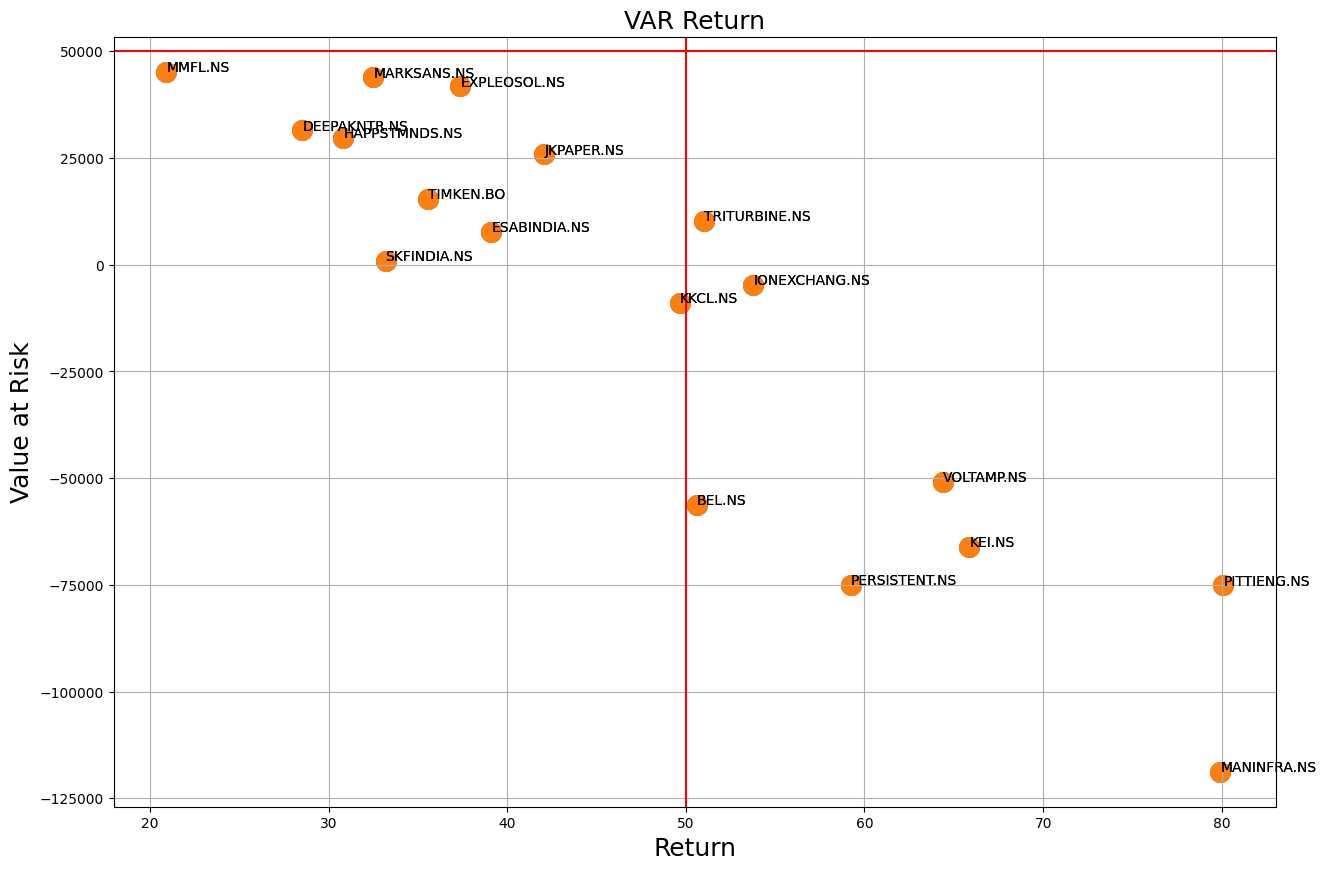

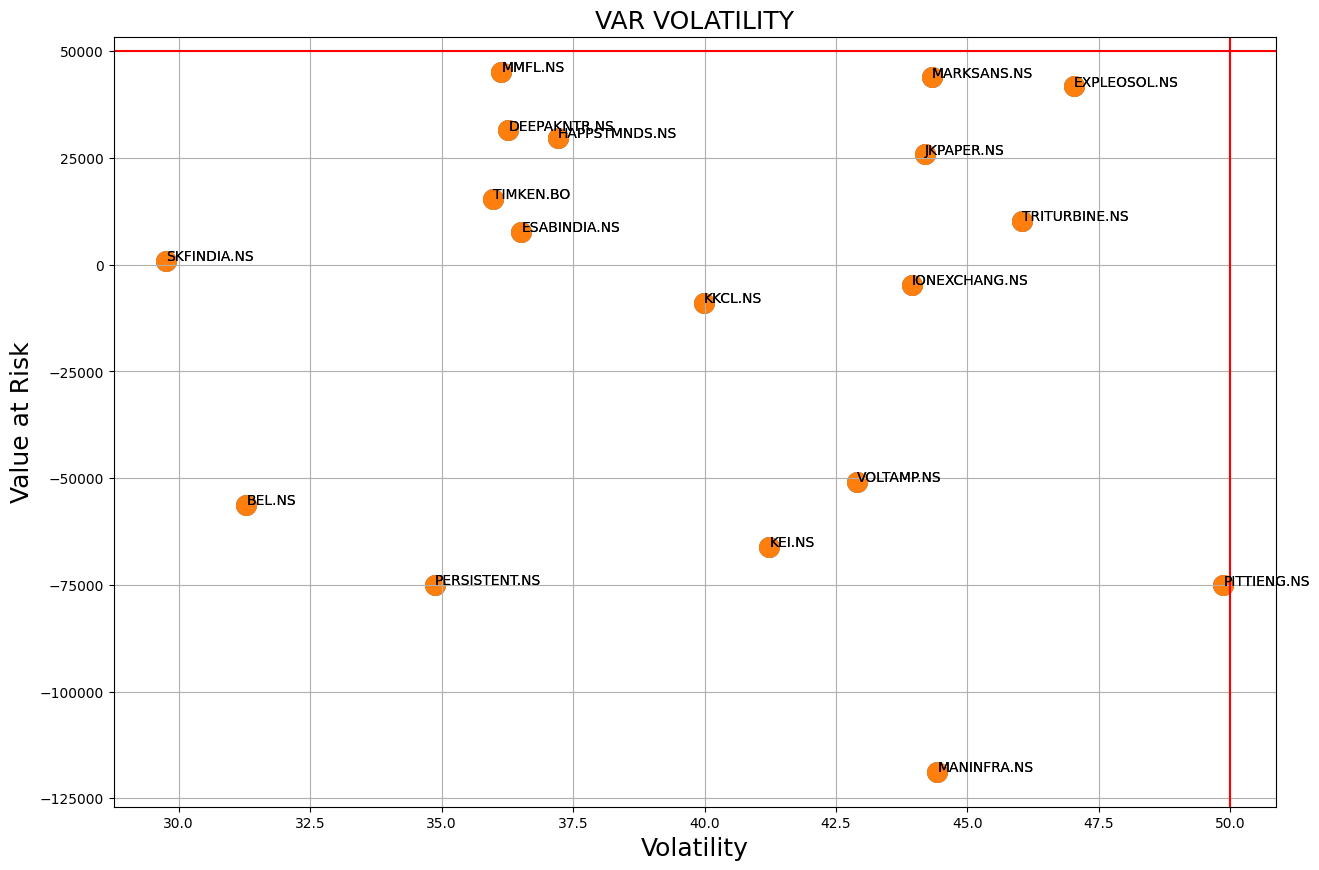

In [51]:
plt.figure(figsize=[15,10])
x= df3['Return%']
y = df3['Value at Risk']
annotations = df3["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df3['Volatility%']
y = df3['Value at Risk']
annotations = df3["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

In [52]:
len(df3)

18

In [53]:
df4 = df3.sort_values(by='Return%', ascending=False)

In [54]:
df4.head(40)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         1      5    PITTIENG.NS  0.017911    0.021866  0.819155   
1         2      2    MANINFRA.NS  0.026131    0.021866  1.195058   
2         3      3         KEI.NS  0.014214    0.021866  0.650058   
3         4     18     VOLTAMP.NS  0.016016    0.021866  0.732474   
4         5     10  PERSISTENT.NS  0.022788    0.021866  1.042193   
5         6      7  IONEXCHANG.NS  0.012790    0.021866  0.584947   
6         7     14  TRITURBINE.NS  0.018118    0.021866  0.828621   
7         8      1         BEL.NS  0.018586    0.021866  0.850008   
8         9     15        KKCL.NS  0.014912    0.021866  0.681978   
9        10     12     JKPAPER.NS  0.024248    0.021866  1.108932   
10       11     22   ESABINDIA.NS  0.012640    0.021866  0.578081   
11       12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879   
12       13     19      TIMKEN.BO  0.010770    0.021866  0.492560   
13       14     17    SKFINDIA.NS  0.012723    0.021866  0.581846   
14       15      8    MARKSANS.NS  0.018215    0.021866  0.833056   
15       17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044   
16       18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277   
17       19     13        MMFL.NS  0.014052    0.021866  0.642660   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     49.862418  80.079939   62.265804     1.505742  122.490844  31.922989   
1     44.428281  79.927336   55.585840     1.686478  122.152034  48.152470   
2     41.232588  65.860468   62.605975     1.476028   93.037343  21.472188   
3     42.895113  64.393513   66.614028     1.384622   90.230017  31.442913   
4     34.872969  59.231003   58.876208     1.555101   80.671184  36.085400   
5     43.939809  53.783923   81.696921     1.110244   41.298121  23.809918   
6     46.039210  51.011246   90.253059     0.999393   66.432925  31.684732   
7     31.290192  50.620006   61.813885     1.457965   65.783922  22.007849   
8     39.983685  49.662532   80.510767     1.117019   64.206286  33.172127   
9     44.188694  42.076551  105.019763     0.839051   52.226010  31.294038   
10    36.516811  39.106080   93.378857     0.933983   47.776621  22.852517   
11    47.018819  37.365173  125.835947     0.688345   46.183976  36.096971   
12    35.972302  35.539579  101.217581     0.848975   41.094985  24.430418   
13    29.767173  33.186565   89.696456     0.946901   39.293994  24.793149   
14    44.324748  32.510862  136.338275     0.620666   38.357217  58.276045   
15    37.211605  30.825509  120.716919     0.694018   36.048053  49.800145   
16    36.269932  28.525277  127.150147     0.648617   32.958488  41.228339   
17    36.133582  20.917518  172.743165     0.440519   23.231205  29.965533   

    Value at Risk  
0   -75057.304744  
1  -118767.280877  
2   -66051.891477  
3   -50782.250149  
4   -74934.872780  
5    -4655.732922  
6    10345.697486  
7   -56179.998101  
8    -8865.983587  
9    25944.572916  
10    7700.949290  
11   41873.867792  
12   15486.640325  
13     932.278489  
14   43932.814518  
15   29785.919650  
16   31469.691030  
17   45218.763122

In [55]:
df4.tail(30)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         1      5    PITTIENG.NS  0.017911    0.021866  0.819155   
1         2      2    MANINFRA.NS  0.026131    0.021866  1.195058   
2         3      3         KEI.NS  0.014214    0.021866  0.650058   
3         4     18     VOLTAMP.NS  0.016016    0.021866  0.732474   
4         5     10  PERSISTENT.NS  0.022788    0.021866  1.042193   
5         6      7  IONEXCHANG.NS  0.012790    0.021866  0.584947   
6         7     14  TRITURBINE.NS  0.018118    0.021866  0.828621   
7         8      1         BEL.NS  0.018586    0.021866  0.850008   
8         9     15        KKCL.NS  0.014912    0.021866  0.681978   
9        10     12     JKPAPER.NS  0.024248    0.021866  1.108932   
10       11     22   ESABINDIA.NS  0.012640    0.021866  0.578081   
11       12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879   
12       13     19      TIMKEN.BO  0.010770    0.021866  0.492560   
13       14     17    SKFINDIA.NS  0.012723    0.021866  0.581846   
14       15      8    MARKSANS.NS  0.018215    0.021866  0.833056   
15       17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044   
16       18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277   
17       19     13        MMFL.NS  0.014052    0.021866  0.642660   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     49.862418  80.079939   62.265804     1.505742  122.490844  31.922989   
1     44.428281  79.927336   55.585840     1.686478  122.152034  48.152470   
2     41.232588  65.860468   62.605975     1.476028   93.037343  21.472188   
3     42.895113  64.393513   66.614028     1.384622   90.230017  31.442913   
4     34.872969  59.231003   58.876208     1.555101   80.671184  36.085400   
5     43.939809  53.783923   81.696921     1.110244   41.298121  23.809918   
6     46.039210  51.011246   90.253059     0.999393   66.432925  31.684732   
7     31.290192  50.620006   61.813885     1.457965   65.783922  22.007849   
8     39.983685  49.662532   80.510767     1.117019   64.206286  33.172127   
9     44.188694  42.076551  105.019763     0.839051   52.226010  31.294038   
10    36.516811  39.106080   93.378857     0.933983   47.776621  22.852517   
11    47.018819  37.365173  125.835947     0.688345   46.183976  36.096971   
12    35.972302  35.539579  101.217581     0.848975   41.094985  24.430418   
13    29.767173  33.186565   89.696456     0.946901   39.293994  24.793149   
14    44.324748  32.510862  136.338275     0.620666   38.357217  58.276045   
15    37.211605  30.825509  120.716919     0.694018   36.048053  49.800145   
16    36.269932  28.525277  127.150147     0.648617   32.958488  41.228339   
17    36.133582  20.917518  172.743165     0.440519   23.231205  29.965533   

    Value at Risk  
0   -75057.304744  
1  -118767.280877  
2   -66051.891477  
3   -50782.250149  
4   -74934.872780  
5    -4655.732922  
6    10345.697486  
7   -56179.998101  
8    -8865.983587  
9    25944.572916  
10    7700.949290  
11   41873.867792  
12   15486.640325  
13     932.278489  
14   43932.814518  
15   29785.919650  
16   31469.691030  
17   45218.763122

In [56]:
df3.head(20)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         1      5    PITTIENG.NS  0.017911    0.021866  0.819155   
1         2      2    MANINFRA.NS  0.026131    0.021866  1.195058   
2         3      3         KEI.NS  0.014214    0.021866  0.650058   
3         4     18     VOLTAMP.NS  0.016016    0.021866  0.732474   
4         5     10  PERSISTENT.NS  0.022788    0.021866  1.042193   
5         6      7  IONEXCHANG.NS  0.012790    0.021866  0.584947   
6         7     14  TRITURBINE.NS  0.018118    0.021866  0.828621   
7         8      1         BEL.NS  0.018586    0.021866  0.850008   
8         9     15        KKCL.NS  0.014912    0.021866  0.681978   
9        10     12     JKPAPER.NS  0.024248    0.021866  1.108932   
10       11     22   ESABINDIA.NS  0.012640    0.021866  0.578081   
11       12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879   
12       13     19      TIMKEN.BO  0.010770    0.021866  0.492560   
13       14     17    SKFINDIA.NS  0.012723    0.021866  0.581846   
14       15      8    MARKSANS.NS  0.018215    0.021866  0.833056   
15       17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044   
16       18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277   
17       19     13        MMFL.NS  0.014052    0.021866  0.642660   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     49.862418  80.079939   62.265804     1.505742  122.490844  31.922989   
1     44.428281  79.927336   55.585840     1.686478  122.152034  48.152470   
2     41.232588  65.860468   62.605975     1.476028   93.037343  21.472188   
3     42.895113  64.393513   66.614028     1.384622   90.230017  31.442913   
4     34.872969  59.231003   58.876208     1.555101   80.671184  36.085400   
5     43.939809  53.783923   81.696921     1.110244   41.298121  23.809918   
6     46.039210  51.011246   90.253059     0.999393   66.432925  31.684732   
7     31.290192  50.620006   61.813885     1.457965   65.783922  22.007849   
8     39.983685  49.662532   80.510767     1.117019   64.206286  33.172127   
9     44.188694  42.076551  105.019763     0.839051   52.226010  31.294038   
10    36.516811  39.106080   93.378857     0.933983   47.776621  22.852517   
11    47.018819  37.365173  125.835947     0.688345   46.183976  36.096971   
12    35.972302  35.539579  101.217581     0.848975   41.094985  24.430418   
13    29.767173  33.186565   89.696456     0.946901   39.293994  24.793149   
14    44.324748  32.510862  136.338275     0.620666   38.357217  58.276045   
15    37.211605  30.825509  120.716919     0.694018   36.048053  49.800145   
16    36.269932  28.525277  127.150147     0.648617   32.958488  41.228339   
17    36.133582  20.917518  172.743165     0.440519   23.231205  29.965533   

    Value at Risk  
0   -75057.304744  
1  -118767.280877  
2   -66051.891477  
3   -50782.250149  
4   -74934.872780  
5    -4655.732922  
6    10345.697486  
7   -56179.998101  
8    -8865.983587  
9    25944.572916  
10    7700.949290  
11   41873.867792  
12   15486.640325  
13     932.278489  
14   43932.814518  
15   29785.919650  
16   31469.691030  
17   45218.763122

In [57]:
df2.head(30)

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0      16     AVANTEL.BO  0.017964    0.021866  0.821544    53.874559   
1       5    PITTIENG.NS  0.017911    0.021866  0.819155    49.862418   
2       2    MANINFRA.NS  0.026131    0.021866  1.195058    44.428281   
3       3         KEI.NS  0.014214    0.021866  0.650058    41.232588   
4      18     VOLTAMP.NS  0.016016    0.021866  0.732474    42.895113   
5      10  PERSISTENT.NS  0.022788    0.021866  1.042193    34.872969   
6       7  IONEXCHANG.NS  0.012790    0.021866  0.584947    43.939809   
7      14  TRITURBINE.NS  0.018118    0.021866  0.828621    46.039210   
8       1         BEL.NS  0.018586    0.021866  0.850008    31.290192   
9      15        KKCL.NS  0.014912    0.021866  0.681978    39.983685   
10     12     JKPAPER.NS  0.024248    0.021866  1.108932    44.188694   
11     22   ESABINDIA.NS  0.012640    0.021866  0.578081    36.516811   
12     11   EXPLEOSOL.NS  0.016659    0.021866  0.761879    47.018819   
13     19      TIMKEN.BO  0.010770    0.021866  0.492560    35.972302   
14     17    SKFINDIA.NS  0.012723    0.021866  0.581846    29.767173   
15      8    MARKSANS.NS  0.018215    0.021866  0.833056    44.324748   
16      0   VIMTALABS.NS  0.011879    0.021866  0.543282    49.477745   
17      9  HAPPSTMNDS.NS  0.016269    0.021866  0.744044    37.211605   
18      4   DEEPAKNTR.NS  0.024015    0.021866  1.098277    36.269932   
19     13        MMFL.NS  0.014052    0.021866  0.642660    36.133582   
20     20   GUJGASLTD.NS  0.014639    0.021866  0.669513    32.656707   
21      6  VINATIORGA.NS  0.009527    0.021866  0.435721    27.694308   
22     21     PAGEIND.NS  0.015240    0.021866  0.696993    27.192043   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   95.750708   56.265442     1.684482  164.607894  31.118336 -132023.622735  
1   80.079939   62.265804     1.505742  122.490844  31.922989  -75057.304744  
2   79.927336   55.585840     1.686478  122.152034  48.152470 -118767.280877  
3   65.860468   62.605975     1.476028   93.037343  21.472188  -66051.891477  
4   64.393513   66.614028     1.384622   90.230017  31.442913  -50782.250149  
5   59.231003   58.876208     1.555101   80.671184  36.085400  -74934.872780  
6   53.783923   81.696921     1.110244   41.298121  23.809918   -4655.732922  
7   51.011246   90.253059     0.999393   66.432925  31.684732   10345.697486  
8   50.620006   61.813885     1.457965   65.783922  22.007849  -56179.998101  
9   49.662532   80.510767     1.117019   64.206286  33.172127   -8865.983587  
10  42.076551  105.019763     0.839051   52.226010  31.294038   25944.572916  
11  39.106080   93.378857     0.933983   47.776621  22.852517    7700.949290  
12  37.365173  125.835947     0.688345   46.183976  36.096971   41873.867792  
13  35.539579  101.217581     0.848975   41.094985  24.430418   15486.640325  
14  33.186565   89.696456     0.946901   39.293994  24.793149     932.278489  
15  32.510862  136.338275     0.620666   38.357217  58.276045   43932.814518  
16  30.957587  159.824295     0.524632   37.334655  39.961254   57022.496426  
17  30.825509  120.716919     0.694018   36.048053  49.800145   29785.919650  
18  28.525277  127.150147     0.648617   32.958488  41.228339   31469.691030  
19  20.917518  172.743165     0.440519   23.231205  29.965533   45218.763122  
20  13.723505  237.961850     0.267128   14.688475  47.694597   48858.330220  
21  12.034033  230.133222     0.253988   12.312217  28.090248   41929.140892  
22  11.392265  238.688644     0.235079   11.742847  33.070984   41819.042280

In [58]:
dfcv = df1.sort_values(by='CV', ascending=True)

In [59]:
dfcv

Ticker   Cov_mar  Market_var      Beta  Volatility%    Return%  \
2     MANINFRA.NS  0.026131    0.021866  1.195058    44.428281  79.927336   
16     AVANTEL.BO  0.017964    0.021866  0.821544    53.874559  95.750708   
10  PERSISTENT.NS  0.022788    0.021866  1.042193    34.872969  59.231003   
1          BEL.NS  0.018586    0.021866  0.850008    31.290192  50.620006   
5     PITTIENG.NS  0.017911    0.021866  0.819155    49.862418  80.079939   
3          KEI.NS  0.014214    0.021866  0.650058    41.232588  65.860468   
18     VOLTAMP.NS  0.016016    0.021866  0.732474    42.895113  64.393513   
15        KKCL.NS  0.014912    0.021866  0.681978    39.983685  49.662532   
7   IONEXCHANG.NS  0.012790    0.021866  0.584947    43.939809  53.783923   
17    SKFINDIA.NS  0.012723    0.021866  0.581846    29.767173  33.186565   
14  TRITURBINE.NS  0.018118    0.021866  0.828621    46.039210  51.011246   
22   ESABINDIA.NS  0.012640    0.021866  0.578081    36.516811  39.106080   
19      TIMKEN.BO  0.010770    0.021866  0.492560    35.972302  35.539579   
12     JKPAPER.NS  0.024248    0.021866  1.108932    44.188694  42.076551   
9   HAPPSTMNDS.NS  0.016269    0.021866  0.744044    37.211605  30.825509   
11   EXPLEOSOL.NS  0.016659    0.021866  0.761879    47.018819  37.365173   
4    DEEPAKNTR.NS  0.024015    0.021866  1.098277    36.269932  28.525277   
8     MARKSANS.NS  0.018215    0.021866  0.833056    44.324748  32.510862   
0    VIMTALABS.NS  0.011879    0.021866  0.543282    49.477745  30.957587   
13        MMFL.NS  0.014052    0.021866  0.642660    36.133582  20.917518   
6   VINATIORGA.NS  0.009527    0.021866  0.435721    27.694308  12.034033   
20   GUJGASLTD.NS  0.014639    0.021866  0.669513    32.656707  13.723505   
21     PAGEIND.NS  0.015240    0.021866  0.696993    27.192043  11.392265   

            CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
2    55.585840     1.686478  122.152034  48.152470 -118767.280877  
16   56.265442     1.684482  164.607894  31.118336 -132023.622735  
10   58.876208     1.555101   80.671184  36.085400  -74934.872780  
1    61.813885     1.457965   65.783922  22.007849  -56179.998101  
5    62.265804     1.505742  122.490844  31.922989  -75057.304744  
3    62.605975     1.476028   93.037343  21.472188  -66051.891477  
18   66.614028     1.384622   90.230017  31.442913  -50782.250149  
15   80.510767     1.117019   64.206286  33.172127   -8865.983587  
7    81.696921     1.110244   41.298121  23.809918   -4655.732922  
17   89.696456     0.946901   39.293994  24.793149     932.278489  
14   90.253059     0.999393   66.432925  31.684732   10345.697486  
22   93.378857     0.933983   47.776621  22.852517    7700.949290  
19  101.217581     0.848975   41.094985  24.430418   15486.640325  
12  105.019763     0.839051   52.226010  31.294038   25944.572916  
9   120.716919     0.694018   36.048053  49.800145   29785.919650  
11  125.835947     0.688345   46.183976  36.096971   41873.867792  
4   127.150147     0.648617   32.958488  41.228339   31469.691030  
8   136.338275     0.620666   38.357217  58.276045   43932.814518  
0   159.824295     0.524632   37.334655  39.961254   57022.496426  
13  172.743165     0.440519   23.231205  29.965533   45218.763122  
6   230.133222     0.253988   12.312217  28.090248   41929.140892  
20  237.961850     0.267128   14.688475  47.694597   48858.330220  
21  238.688644     0.235079   11.742847  33.070984   41819.042280

In [60]:
dfcv.to_csv("//Users//sjacob//Downloads//NEWSTOCK1.csv")